In [99]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [100]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [156]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Read the CSV and Perform Basic Data Cleaning

In [157]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [158]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

# Select your features (columns)

In [159]:
# Set features. This will also be used as your x values.
# X_numerical = df.drop(['koi_disposition'], axis=1)   # ['koi_disposition', "koi_fpflag_nt", 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
X_numerical = df[['koi_fpflag_co','koi_fpflag_nt','koi_fpflag_ss','koi_model_snr','koi_prad','koi_fpflag_ec','koi_prad_err1','koi_prad_err2','koi_duration_err2','koi_steff_err1','koi_duration_err1','koi_steff_err2','koi_duration','koi_time0bk_err2','koi_time0bk_err1']]

y = df['koi_disposition']

# Create a Train Test Split

Use `koi_disposition` for the y values

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.33, random_state=1)

In [161]:
X_train.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_fpflag_ec,koi_prad_err1,koi_prad_err2,koi_duration_err2,koi_steff_err1,koi_duration_err1,koi_steff_err2,koi_duration,koi_time0bk_err2,koi_time0bk_err1
2067,1,0,0,74.3,7.84,1,1.17,-2.55,-0.0693,170,0.0693,-170,3.4303,-0.00105,0.00105
6706,0,1,0,11.6,1.82,0,0.11,-0.19,-1.5000,145,1.5000,-145,23.6600,-0.03940,0.03940
4935,0,0,0,11.7,2.15,0,0.77,-0.31,-0.6230,169,0.6230,-175,11.4280,-0.02090,0.02090
1859,1,0,0,15.1,0.64,1,0.14,-0.07,-0.3050,152,0.3050,-152,4.2680,-0.00980,0.00980
190,0,0,0,36.4,2.85,0,0.80,-0.34,-0.0630,162,0.0630,-217,2.5833,-0.00176,0.00176


In [162]:
X_test.dtypes

koi_fpflag_co          int64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_model_snr        float64
koi_prad             float64
koi_fpflag_ec          int64
koi_prad_err1        float64
koi_prad_err2        float64
koi_duration_err2    float64
koi_steff_err1         int64
koi_duration_err1    float64
koi_steff_err2         int64
koi_duration         float64
koi_time0bk_err2     float64
koi_time0bk_err1     float64
dtype: object

In [163]:
feature_names = X_train.columns
feature_names

Index(['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr',
       'koi_prad', 'koi_fpflag_ec', 'koi_prad_err1', 'koi_prad_err2',
       'koi_duration_err2', 'koi_steff_err1', 'koi_duration_err1',
       'koi_steff_err2', 'koi_duration', 'koi_time0bk_err2',
       'koi_time0bk_err1'],
      dtype='object')

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [164]:
# Scale data
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = LabelEncoder().fit(y_train)

In [165]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [166]:
np.unique(y_train_scaled)

array([0, 1, 2])

In [167]:
np.shape(X_train_scaled)

(4683, 15)

In [168]:
np.shape(X_test_scaled)

(2308, 15)

# Train the Model



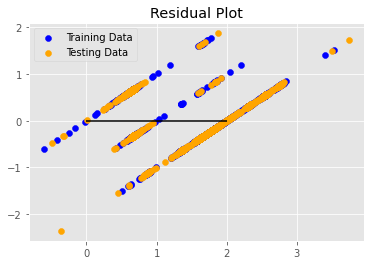

In [125]:
# Plot the results 
# this was predicted not to work since it is not a classification 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [126]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23424161505209906, R2: 0.6531157351382884


In [127]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.648595755665588
Testing Data Score: 0.6531157351382884


## Train the Model - Classifier I

In [172]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
classifier.fit(X_train_scaled, y_train)

C:\Users\ejwda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ejwda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.4947683109118087
Testing Data Score: 0.5138648180242634


In [131]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['CONFIRMED' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'CONFIRMED' 'FALSE POSITIVE']
First 10 Actual labels: ['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']


In [132]:
df2 = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
df2.head(20)

,Prediction,Actual
0,CONFIRMED,CONFIRMED
1,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
3,CONFIRMED,CONFIRMED
4,FALSE POSITIVE,FALSE POSITIVE
5,FALSE POSITIVE,FALSE POSITIVE
6,FALSE POSITIVE,FALSE POSITIVE
7,CONFIRMED,CONFIRMED
8,CONFIRMED,CANDIDATE
9,FALSE POSITIVE,FALSE POSITIVE


## Train the Model - Classifier II

In [133]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train)

1.0

In [134]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.13495014, 0.11540791, 0.07659493, 0.08339252, 0.08354487,
       0.0506476 , 0.05970131, 0.05921415, 0.04893279, 0.05377663,
       0.05812825, 0.04608461, 0.04655294, 0.04171541, 0.04135596])

In [135]:
# We can sort the features by their importance
sort_val = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
n0=[]
n1=[]
val = 0
[(n0.append(i[1]), n1.append(i[0])) for i in sort_val[:15]]
n0

['koi_fpflag_co',
 'koi_fpflag_nt',
 'koi_prad',
 'koi_model_snr',
 'koi_fpflag_ss',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_duration_err1',
 'koi_steff_err1',
 'koi_fpflag_ec',
 'koi_duration_err2',
 'koi_duration',
 'koi_steff_err2',
 'koi_time0bk_err2',
 'koi_time0bk_err1']

In [136]:
sum(n1)

0.9999999999999999

(0.06610593384107973, 'koi_model_snr'),
 (0.06484630827528662, 'koi_prad'),
 (0.04951380195045578, 'koi_steff_err2'),
 (0.04607729072043813, 'koi_prad_err2'),
 (0.04554055237472794, 'koi_prad_err1'),
 (0.04201150080120374, 'koi_duration_err2'),
 (0.04090806919787202, 'koi_steff_err1'),
 (0.03696056569716269, 'koi_duration_err1'),
 (0.033746497293473225, 'koi_duration'),
 (0.03304202128851946, 'koi_impact'),
 (0.03271075578181022, 'koi_period'),
 (0.03157706291786335, 'koi_insol_err1'),
 (0.030403055761797675, 'koi_depth'),
 (0.027564597256782123, 'koi_teq'),
 (0.02714549136899293, 'koi_time0bk_err2'),
 (0.025993333216961893, 'koi_time0bk_err1'),
 (0.025512950031831686, 'koi_insol'),
 (0.02422983113431763, 'koi_period_err1'),
 (0.02283000832167326, 'ra'),
 (0.022680901948475864, 'koi_insol_err2'),
 (0.022384978534481483, 'koi_period_err2'),
 (0.02215778474974851, 'koi_time0bk'),
 (0.020786805913773177, 'dec'),
 (0.01962426004984283, 'koi_depth_err1'),
 (0.019107615249243336, 'koi_depth_err2'),
 (0.0184051190762865, 'koi_kepmag'),
 (0.01829905519923685, 'koi_impact_err1'),
 (0.017616856118120798, 'koi_impact_err2'),
 (0.01744543311011708, 'koi_srad_err1'),
 (0.016605184164908426, 'koi_slogg_err2'),
 (0.015559432901788193, 'koi_steff'),
 (0.015402622549975422, 'koi_srad'),
 (0.014956856253066631, 'koi_slogg'),
 (0.014481806601558827, 'koi_slogg_err1'),
 (0.013313301728219788, 'koi_srad_err2'),
 (0.004452358618906134, 'koi_tce_plnt_num')

## Train the Model - Classifier III

In [137]:
# Create and score a decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

## Train the Model - Classifier IV

k: 1, Train/Test Score: 1.000/0.847
k: 3, Train/Test Score: 0.914/0.870
k: 5, Train/Test Score: 0.901/0.882
k: 7, Train/Test Score: 0.896/0.886
k: 9, Train/Test Score: 0.889/0.886
k: 11, Train/Test Score: 0.888/0.888
k: 13, Train/Test Score: 0.886/0.891
k: 15, Train/Test Score: 0.887/0.890
k: 17, Train/Test Score: 0.886/0.889
k: 19, Train/Test Score: 0.885/0.894
k: 21, Train/Test Score: 0.886/0.893
k: 23, Train/Test Score: 0.881/0.892
k: 25, Train/Test Score: 0.881/0.889
k: 27, Train/Test Score: 0.880/0.892
k: 29, Train/Test Score: 0.879/0.890
k: 31, Train/Test Score: 0.878/0.893
k: 33, Train/Test Score: 0.876/0.894
k: 35, Train/Test Score: 0.876/0.893
k: 37, Train/Test Score: 0.877/0.894
k: 39, Train/Test Score: 0.875/0.895


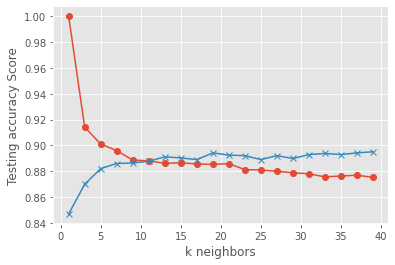

In [138]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [139]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))


k=17 Test Acc: 0.889


## Train the Model - Classifier V

In [140]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train_scaled)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [141]:
predictions = model.predict(X_test_scaled)

In [142]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_scaled, predictions,
                            target_names=['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']))

                precision    recall  f1-score   support

     CONFIRMED       0.72      0.65      0.68       548
FALSE POSITIVE       0.69      0.75      0.72       572
     CANDIDATE       0.99      1.00      0.99      1188

      accuracy                           0.85      2308
     macro avg       0.80      0.80      0.80      2308
  weighted avg       0.85      0.85      0.85      2308



In [143]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test_scaled))

Test Acc: 0.853


## Train the Model - Classifier VI

In [144]:
from sklearn.neighbors import KNeighborsClassifier
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [145]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [8, 16, 32],
              'gamma': [0.00001, 0.0001, 0.001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [146]:
grid.fit(X_train_scaled, y_train_scaled)

C:\Users\ejwda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=8, gamma=1e-05 ................................................
[CV] .................... C=8, gamma=1e-05, score=0.857, total=   0.1s
[CV] C=8, gamma=1e-05 ................................................
[CV] .................... C=8, gamma=1e-05, score=0.844, total=   0.1s
[CV] C=8, gamma=1e-05 ................................................
[CV] .................... C=8, gamma=1e-05, score=0.849, total=   0.1s
[CV] C=8, gamma=0.0001 ...............................................
[CV] ................... C=8, gamma=0.0001, score=0.857, total=   0.1s
[CV] C=8, gamma=0.0001 ...............................................
[CV] ................... C=8, gamma=0.0001, score=0.844, total=   0.1s
[CV] C=8, gamma=0.0001 ...............................................
[CV] ................... C=8, gamma=0.0001, score=0.849, total=   0.1s
[CV] C=8, gamma=0.001 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [8, 16, 32], 'gamma': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [147]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 32, 'gamma': 1e-05}


In [148]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [149]:
print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test_scaled))

Test Acc: 0.883


In [150]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_scaled, predictions,
                            target_names=['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']))

                precision    recall  f1-score   support

     CONFIRMED       0.87      0.62      0.72       548
FALSE POSITIVE       0.71      0.90      0.79       572
     CANDIDATE       0.99      1.00      0.99      1188

      accuracy                           0.88      2308
     macro avg       0.86      0.84      0.84      2308
  weighted avg       0.89      0.88      0.88      2308



# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'grid-search-results.sav'
joblib.dump(grid, filename)